In [2]:
import pandas as pd
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 500)

from pyspark.sql import SparkSession
from pyspark.sql import functions as F, types as T, DataFrame as D
from pyspark.sql.window import Window
spark = SparkSession.builder.appName('abc').getOrCreate()

### EXPLORING WINDOW TIMES

In [6]:
df_frequencies = spark.read.option("header","true").csv("frequencies.csv")

In [7]:
df_frequencies.limit(10).toPandas()

,year,month,day,busstop_number,name,latitude,longitude,time_span5min,next_time_span5min,time_span10min,...,set_vehicles20min,set_lines20min,count_lines25min,count_vehicles25min,set_vehicles25min,set_lines25min,count_lines30min,count_vehicles30min,set_vehicles30min,set_lines30min
0,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 06:05:00,2019-05-01 06:10:00,2019-05-01 06:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
1,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 07:05:00,2019-05-01 07:10:00,2019-05-01 07:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
2,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 08:00:00,2019-05-01 08:05:00,2019-05-01 08:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
3,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 09:00:00,2019-05-01 09:05:00,2019-05-01 09:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
4,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 10:05:00,2019-05-01 10:10:00,2019-05-01 10:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
5,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 11:05:00,2019-05-01 11:10:00,2019-05-01 11:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
6,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 12:05:00,2019-05-01 12:10:00,2019-05-01 12:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
7,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 13:05:00,2019-05-01 13:10:00,2019-05-01 13:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
8,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 14:05:00,2019-05-01 14:10:00,2019-05-01 14:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
9,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 15:05:00,2019-05-01 15:10:00,2019-05-01 15:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']


In [9]:
df_frequencies.filter("day ==1").limit(10).toPandas()

,year,month,day,busstop_number,name,latitude,longitude,time_span5min,next_time_span5min,time_span10min,...,set_vehicles20min,set_lines20min,count_lines25min,count_vehicles25min,set_vehicles25min,set_lines25min,count_lines30min,count_vehicles30min,set_vehicles30min,set_lines30min
0,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 06:05:00,2019-05-01 06:10:00,2019-05-01 06:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
1,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 07:05:00,2019-05-01 07:10:00,2019-05-01 07:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
2,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 08:00:00,2019-05-01 08:05:00,2019-05-01 08:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
3,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 09:00:00,2019-05-01 09:05:00,2019-05-01 09:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
4,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 10:05:00,2019-05-01 10:10:00,2019-05-01 10:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
5,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 11:05:00,2019-05-01 11:10:00,2019-05-01 11:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
6,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 12:05:00,2019-05-01 12:10:00,2019-05-01 12:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
7,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 13:05:00,2019-05-01 13:10:00,2019-05-01 13:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
8,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 14:05:00,2019-05-01 14:10:00,2019-05-01 14:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']
9,2019,5,1,660104,"Rua Amazonas, 197 - Jd. Cecilia - Campo Magro - PR",-25.38146,-49.36393,2019-05-01 15:05:00,2019-05-01 15:10:00,2019-05-01 15:00:00,...,['MN400'],['928'],1,1,['MN400'],['928'],1,1,['MN400'],['928']


##### TAKING TOP 10 LINES WITH HIGHEST NUMBER OF LINES

In [10]:
df_mean_lines = df_frequencies.groupBy(["busstop_number","name","latitude","longitude"]).agg(F.mean('count_lines10min').alias("nr_medio_linhas")).orderBy(F.desc('nr_medio_linhas')).limit(10)

In [11]:
df_mean_lines.toPandas()

,busstop_number,name,latitude,longitude,nr_medio_linhas
0,150332,"Rua Leon Nicolas, 2081 - Cap?o Raso",-25.515159644727,-49.294443608469,3.221893
1,150331,"Av. Winston Churchill, 2472 - Cap?o Raso",-25.518348864079,-49.29566769888,3.152482
2,150751,"Av. Winston Churchill, 2677 - Cap?o Raso",-25.520731874323,-49.295383384725,3.064516
3,110022,"Rua Vinte e Quatro de Maio, 280-350 - Centro",-25.439756734365,-49.273240017786,2.880952
4,160244,"Rua Emanoel Voluz, 284 - Pinheirinho",-25.524017075104,-49.292992119479,2.665493
5,110026,"Rua Alferes Poli, 400 - Reboucas",-25.440705808683,-49.271456482887,2.622120
6,110024,"Rua Alferes Poli, 787 - Reboucas",-25.443478176732,-49.270140950921,2.608696
7,110208,"Av. Iguacu, 1184 - Reboucas",-25.443296676303,-49.272462905592,2.600000
8,150634,"Av. Iguacu, 2612 - Agua Verde",-25.448942375096,-49.287531555838,2.583333
9,150631,"Av. Iguacu, 1788 - Agua Verde",-25.445710238874,-49.278719158119,2.552083


In [12]:
import math 

@F.udf(returnType=T.DoubleType())
def haversine(lon1: float, lat1: float, lon2: float, lat2: float) -> float:
    try:

        R: int = 6371000  # radius of Earth in meters
        phi_1 = math.radians(lat1)
        phi_2 = math.radians(lat2)

        delta_phi = math.radians(lat2 - lat1)
        delta_lambda = math.radians(lon2 - lon1)

        a = math.sin(delta_phi / 2.0) ** 2 + math.cos(phi_1) * \
            math.cos(phi_2) * math.sin(delta_lambda / 2.0) ** 2

        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        return round(R * c, 2)  # output distance in meters
    except Exception as err:
        print(f"Exception has been occurred :{err}")
        print(f"lon1: {lon1} lat1: {lat1} lon2: {lon2} lat2: {lat2}")

In [25]:
#name = input()

In [14]:
df_busstops = df_frequencies.select("busstop_number","name","latitude","longitude").distinct()

In [15]:
df_busstops.withColumn("distance_from_150332", haversine(F.col("longitude").cast("float"),F.col("latitude").cast("float"),F.lit(-49.287531555838),F.lit(-25.448942375096) )).orderBy(F.asc("distance_from_150332")).filter("distance_from_150332 < 600").show(50, truncate=False)

+--------------+-------------------------------------------+----------------+----------------+--------------------+
|busstop_number|name                                       |latitude        |longitude       |distance_from_150332|
+--------------+-------------------------------------------+----------------+----------------+--------------------+
|150634        |Av. Iguacu, 2612 - Agua Verde              |-25.448942375096|-49.287531555838|0.13                |
|108037        |Estac?o Tubo Silva Jardim                  |-25.448322747926|-49.287777398148|73.22               |
|108038        |Estac?o Tubo Silva Jardim                  |-25.448330003815|-49.287868593254|76.04               |
|109003        |Estac?o Tubo Agua Verde / Iguacu           |-25.448301917892|-49.285369401301|228.45              |
|150635        |Av. Pres. Getulio Vargas, 2676 - Agua Verde|-25.449985020239|-49.284862757868|292.01              |
|180535        |Av. Pres. Getulio Vargas, 3047 - Agua Verde|-25.45146710

In [16]:
df_frequencies.printSchema()

root
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)
 |-- busstop_number: string (nullable = true)
 |-- name: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- time_span5min: string (nullable = true)
 |-- next_time_span5min: string (nullable = true)
 |-- time_span10min: string (nullable = true)
 |-- next_time_span10min: string (nullable = true)
 |-- time_span15min: string (nullable = true)
 |-- next_time_span15min: string (nullable = true)
 |-- time_span20min: string (nullable = true)
 |-- next_time_span20min: string (nullable = true)
 |-- time_span25min: string (nullable = true)
 |-- next_time_span25min: string (nullable = true)
 |-- time_span30min: string (nullable = true)
 |-- next_time_span30min: string (nullable = true)
 |-- count_lines5min: string (nullable = true)
 |-- count_vehicles5min: string (nullable = true)
 |-- set_vehicles5min: string (nullable = true)

In [17]:
df_180535 = df_frequencies.filter("busstop_number == '180535'").select("busstop_number","time_span30min","day","count_lines30min","count_vehicles30min").orderBy(F.asc("time_span30min")).distinct().toPandas()

In [18]:
df_180535[(df_180535.day=="2")].head()

,busstop_number,time_span30min,day,count_lines30min,count_vehicles30min
28,180535,2019-05-02 04:30:00,2,1,1
29,180535,2019-05-02 05:00:00,2,1,1
30,180535,2019-05-02 05:30:00,2,2,3
31,180535,2019-05-02 06:00:00,2,4,4
32,180535,2019-05-02 06:30:00,2,6,10


In [19]:
df_180535['count_lines30min'] = pd.to_numeric(df_180535['count_lines30min'])
df_180535['count_vehicles30min'] = pd.to_numeric(df_180535['count_vehicles30min'])

In [20]:
import seaborn as sns
sns.set(rc={'figure.figsize':(35.7,8.27)})

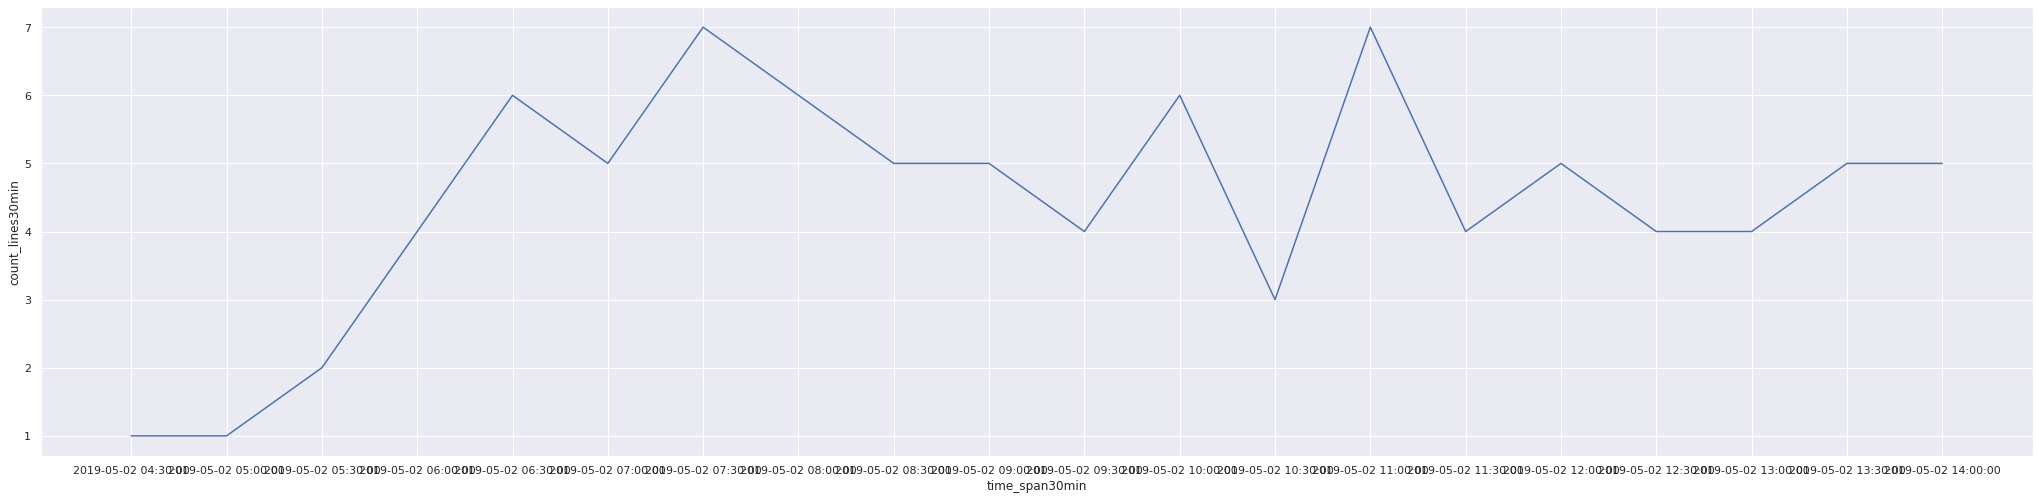

In [21]:
sns.lineplot(data=df_180535[(df_180535.day=="2")].head(20), x="time_span30min", y="count_lines30min")30

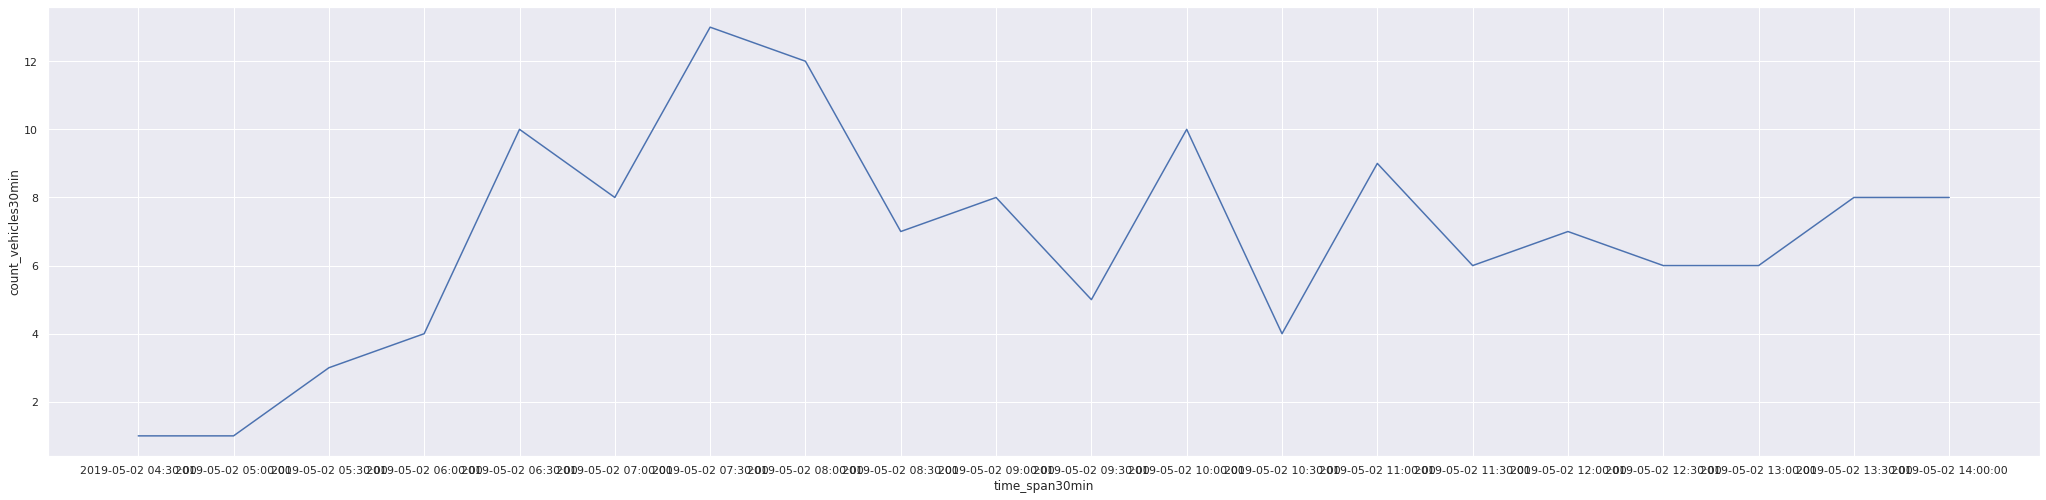

In [22]:
sns.lineplot(data=df_180535[(df_180535.day=="2")].head(20), x="time_span30min", y="count_vehicles30min")

> Alterar o grafo para contemplar o tempo médio de deslocamento entre dois pontos de todas as linhas

```sql
    (bs)-[:NEXT_BS {year,month,day,hour, time_avg, time_std, n_veic}]->(bs)  # um dia pode ter 24 arestas, realizar buscas através do tempo
```

1. Identificar pontos com alta centralidade (demanda)
2. Fixar um raio baseado no tempo médio de caminhada
3. Identificar o número de pontos a área contempla e o número de linhas ( maximizar o número de linhas)
4. Eleger top X áreas e criar arestas virtuais entre estes pontos com tempo médio de caminhada
5. Realizar testes de deslocamento no grafo
6. Identificar mudança topográfica no grafo

https://pbpython.com/styling-pandas.html</br>
https://pbpython.com/monte-carlo.html</br>
https://github.com/chris1610/pbpython/blob/master/notebooks/Monte_Carlo_Simulation.ipynb</br>
http://www.flawofaverages.com/</br>